In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://www.kaggle.com/code/justinas/nba-height-and-weight-analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_seasons.csv')

In [ ]:
df.head()

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   0.479   
1  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   0.430   
2  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   0.376   
3  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   0.399   
4  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   0.611   

   ast_pct   season  
0    0.113  1996-97  
1    0.048  1996-97  
2    0.148  1996-97  
3    0.077  1996-97  
4    0.040  1996-97  

[5 rows x 22 columns]

# **Pre-Processing**

In [ ]:
#checking for null values inside our data, turns out the only nulls are some colleges
df.isnull().sum()

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1684
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [ ]:
#added unknown for null values for college the player went too
df['college'].fillna('unknown', inplace=True)


In [ ]:
#checking again for nulls to make sure
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [ ]:
#the info for our Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [ ]:
#Describe for our data frame
df.describe()

Unnamed: 0           age  player_height  player_weight            gp  \
count  11145.000000  11145.000000   11145.000000   11145.000000  11145.000000   
mean    5572.000000     27.168686     200.812818     100.637868     52.005832   
std     3217.428709      4.344164       9.190973      12.576295     25.069495   
min        0.000000     18.000000     160.020000      60.327736      1.000000   
25%     2786.000000     24.000000     195.580000      90.718400     32.000000   
50%     5572.000000     27.000000     200.660000      99.790240     58.000000   
75%     8358.000000     30.000000     208.280000     109.315672     74.000000   
max    11144.000000     44.000000     231.140000     163.293120     85.000000   

                pts           reb           ast    net_rating      oreb_pct  \
count  11145.000000  11145.000000  11145.000000  11145.000000  11145.000000   
mean       8.126487      3.560036      1.801463     -2.153899      0.055593   
std        5.935482      2.495394      1.789940     12.150611      0.043889   
min        0.000000      0.000000      0.000000   -200.000000      0.000000   
25%        3.500000      1.800000      0.600000     -6.300000      0.022000   
50%        6.600000      3.000000      1.200000     -1.300000      0.043000   
75%       11.500000      4.700000      2.400000      3.200000      0.086000   
max       36.100000     16.300000     11.700000    300.000000      1.000000   

           dreb_pct       usg_pct        ts_pct       ast_pct  
count  11145.000000  11145.000000  11145.000000  11145.000000  
mean       0.141772      0.185599      0.508099      0.131078  
std        0.063194      0.053047      0.098879      0.095017  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.096000      0.150000      0.478000      0.065000  
50%        0.132000      0.182000      0.521000      0.102000  
75%        0.182000      0.218000      0.557000      0.178000  
max        1.000000      1.000000      1.500000      1.000000

In [ ]:
#The collection of our columns
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

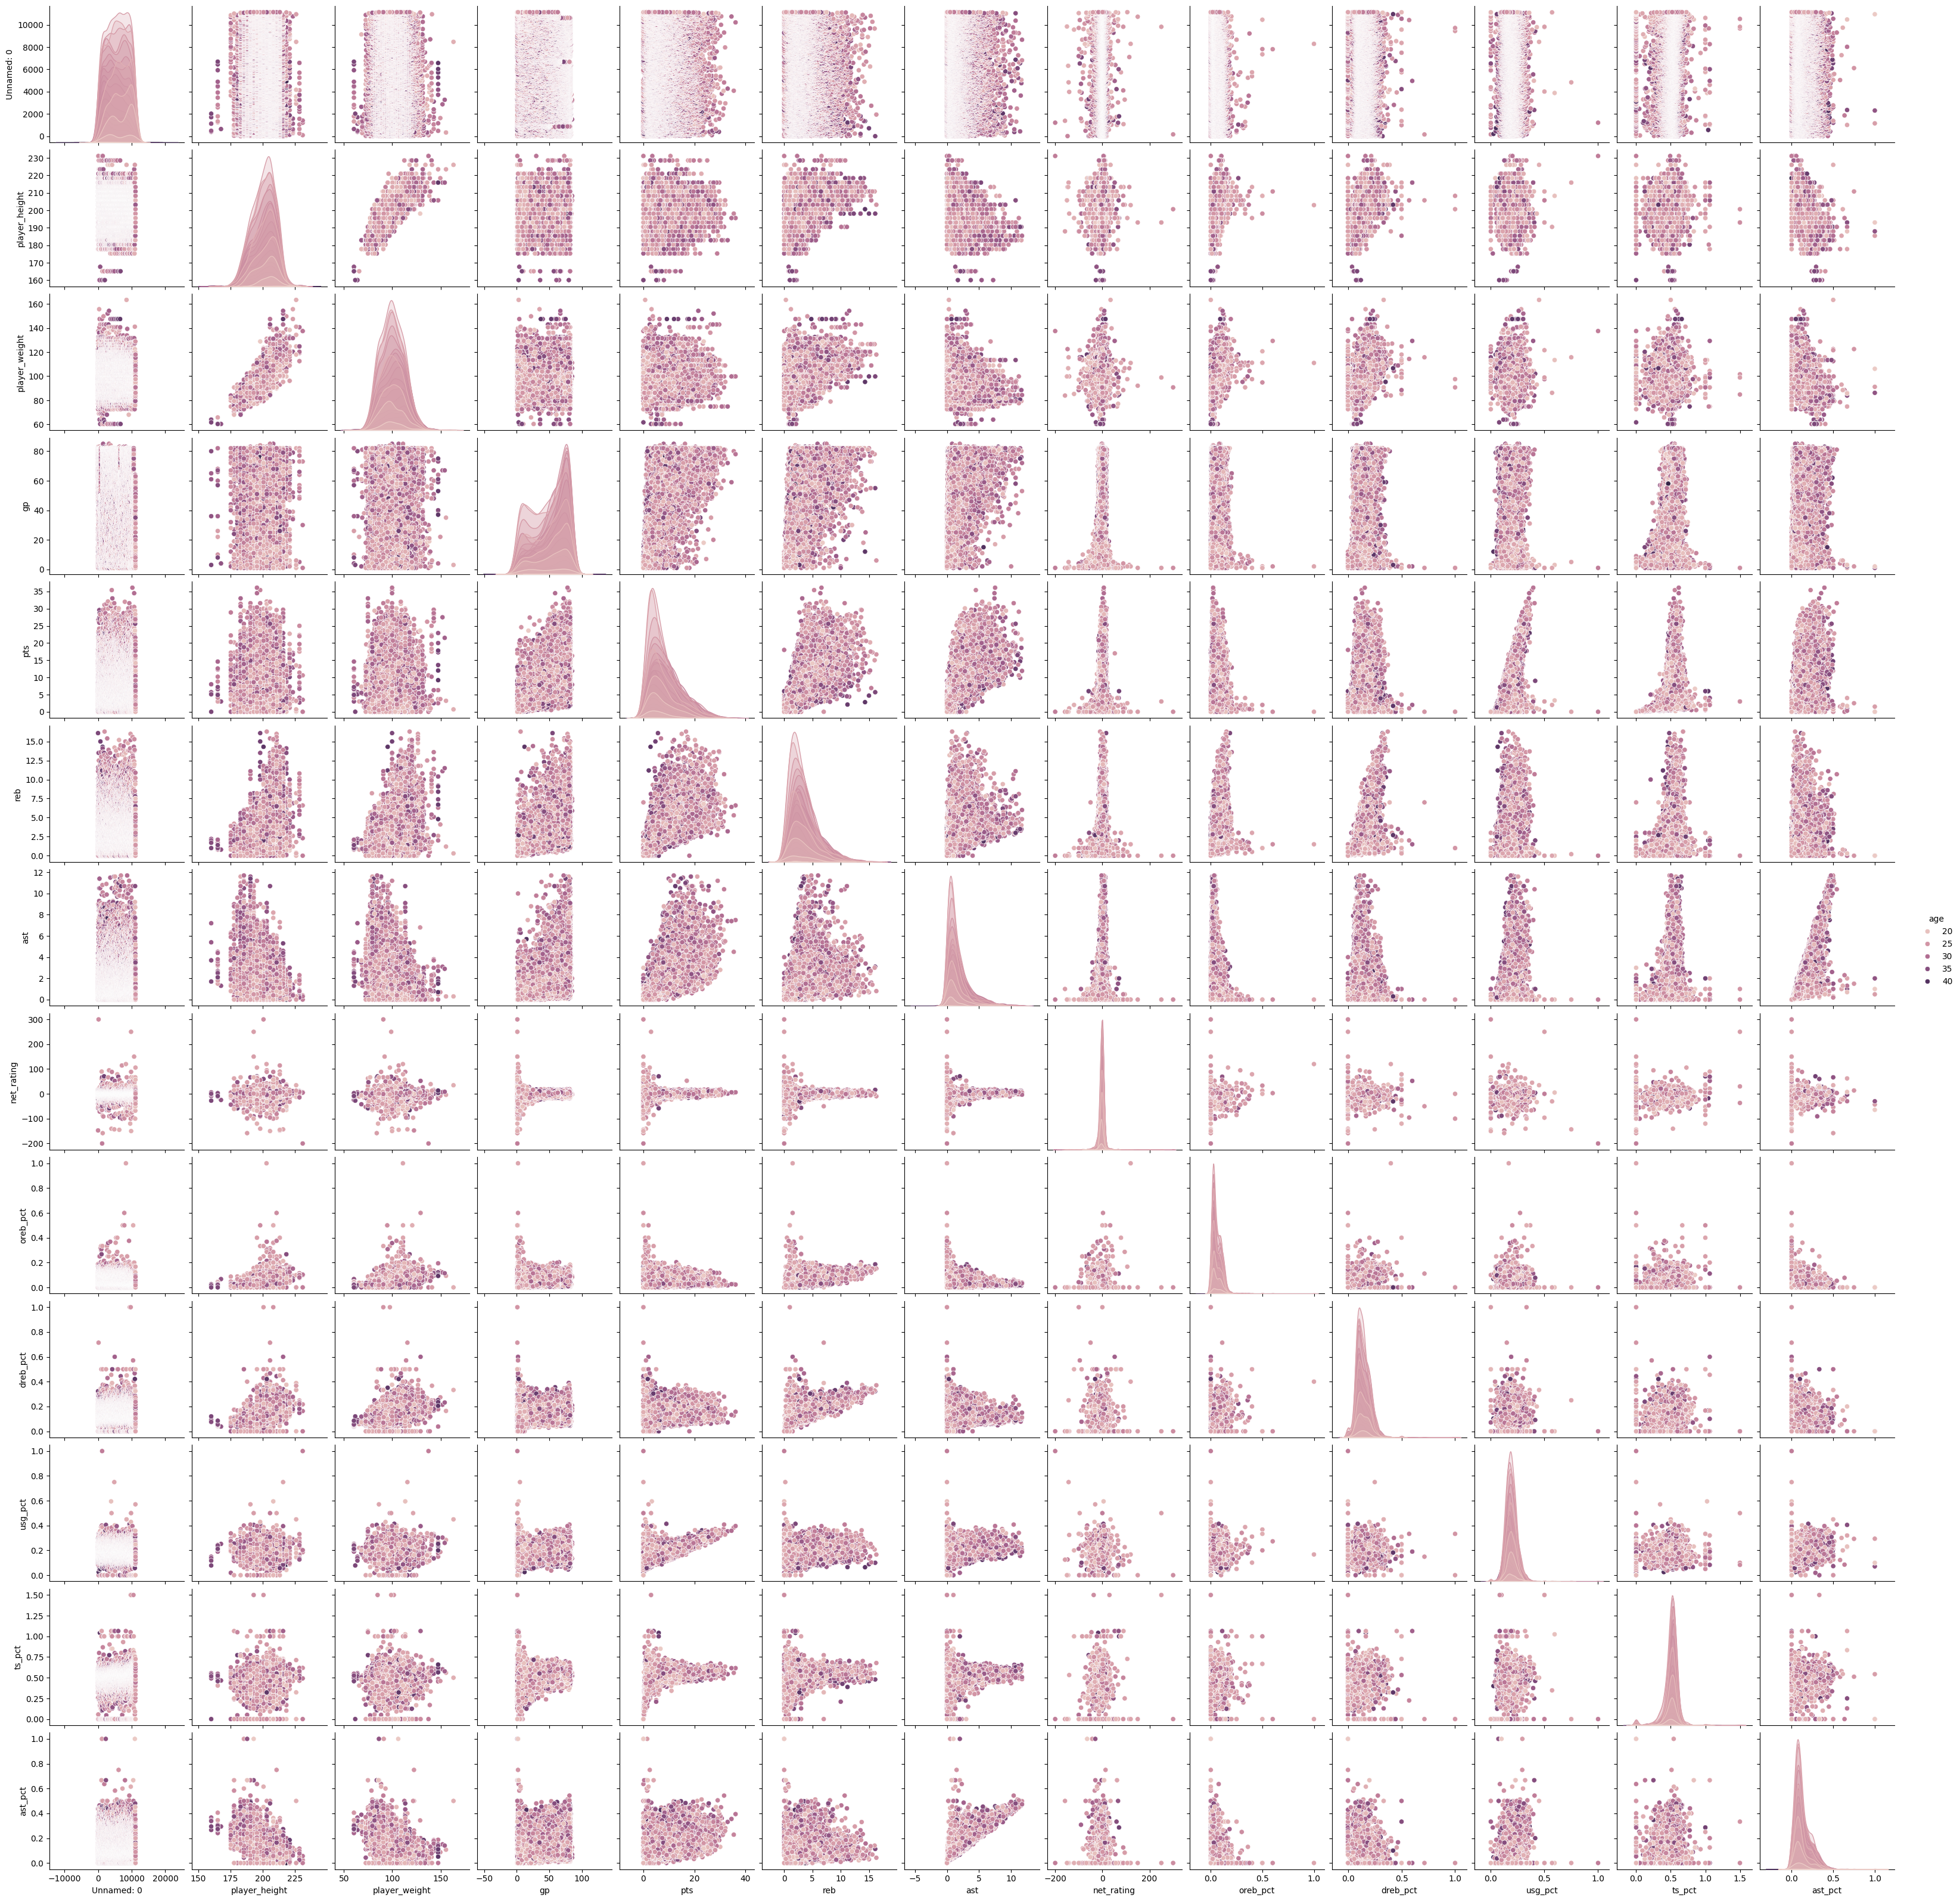

In [ ]:
sns.pairplot(df,hue='age')

# **#1 Was there any missing Data?**

Yes! After looking at our data a bit we realized that in the college column there were some Null values. We came to the conclusion that this is because the player likely didn't attend any college.

# Explore Data Analysis (EDA Process)

**Correlation Heatmap Between Age and Points**




In [ ]:
#correlation heatmap for Age and points

plt.figure(figsize=(10,8))
sns.heatmap(df[['age', 'pts','player_height','player_weight']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap between Age and Points')
plt.show()


# **#2 What correlations does our data have?**

Funny enough, there doesn't seem to be a correlation between metrics such as points scored and age. This is because our data only samples seasons and doesn't have every single season a player played in. The main correlation is between weight and height which makes sense since as someone is taller they typically weigh more.

**Top 10 Colleges with the most round one draft picks**

****

In [ ]:
#Pie Chart for the colleges with the most round one draft picks
top_10_colleges = df['college'].value_counts().nlargest(10)


plt.figure(figsize=(8, 8))
plt.pie(top_10_colleges, labels=top_10_colleges.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Colleges with the Most NBA Draftees')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **#3 Why is the Unknown section by far the most populated for draftees**

One of the big reasons for this after looking through our data set is European players will not have a college listed as our data only shows US colleges. On top of that up until 2005, the NBA didn't require any college play time to get able to get into the NBA draft. Both of these factors lead to this

**Bar Graph of Player Height Vs Rebounds**

In [ ]:
#Bar Graph for Rebounds vs Player Height
plt.figure(figsize=(20, 6))
sns.barplot(x='player_height', y='reb', data=df)
plt.title('Rebounds vs. Player Height')
plt.xlabel('Player Height')
plt.ylabel('Rebounds')
plt.show()


# **#4 Is there a relationship between the amount of rebounds vs players height**

Our data does seem to trend towards as a player gets taller they rebound the ball at a higher rate. While there may be some outliers for example a height of 183 cm rebounding less that 182, this could be explain through metrics such as athletism.

**Rebounds vs Points Scored**

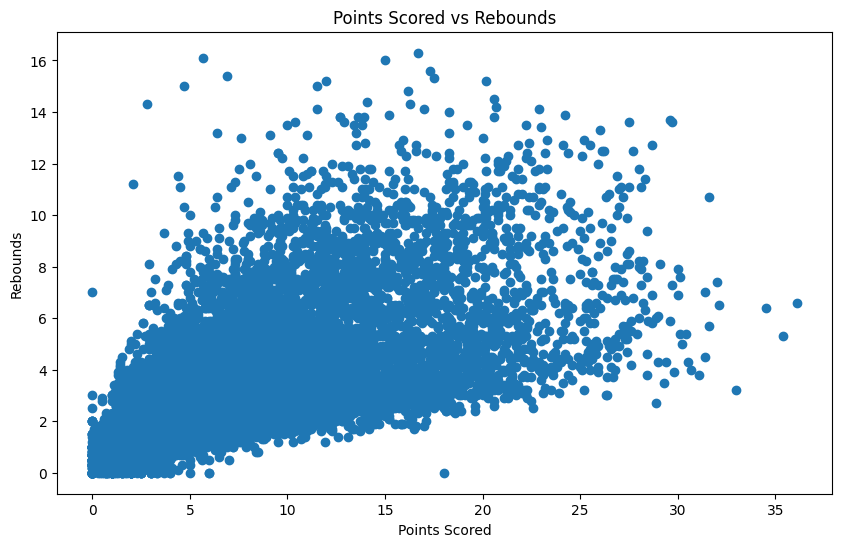

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['pts'], df['reb'])
plt.xlabel("Points Scored")
plt.ylabel("Rebounds")
plt.title("Points Scored vs Rebounds")
plt.show()


**Top Five Season Points Scored vs Bottom Five Season Points Scored**

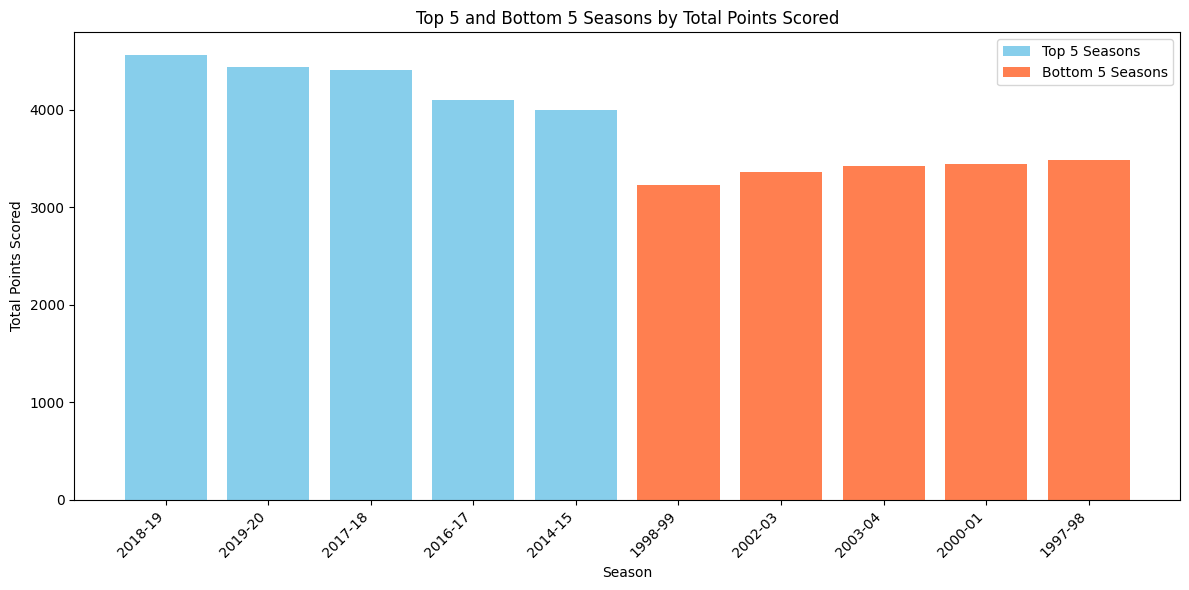

In [ ]:
season_points = df.groupby('season')['pts'].sum()

# Get the top 5 seasons with the most points
top_5_seasons = season_points.nlargest(5)

# Get the bottom 5 seasons with the least points
bottom_5_seasons = season_points.nsmallest(5)

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 5 seasons
plt.bar(top_5_seasons.index, top_5_seasons.values, label='Top 5 Seasons', color='skyblue')

# Plot the bottom 5 seasons
plt.bar(bottom_5_seasons.index, bottom_5_seasons.values, label='Bottom 5 Seasons', color='coral')

plt.xlabel('Season')
plt.ylabel('Total Points Scored')
plt.title('Top 5 and Bottom 5 Seasons by Total Points Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


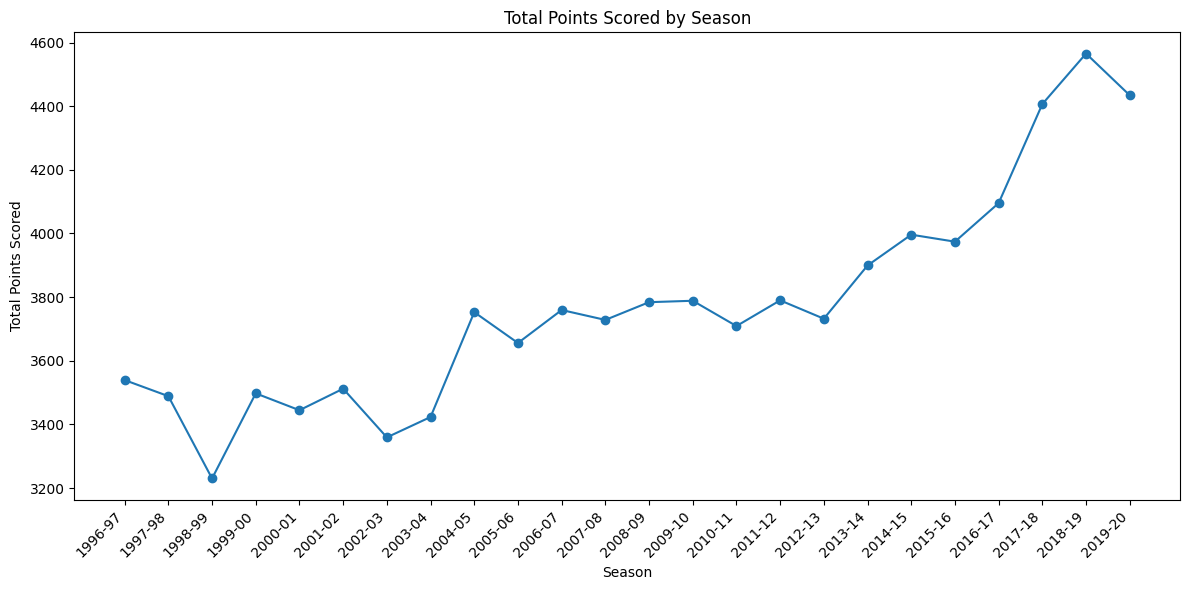

In [ ]:
season_points = df.groupby('season')['pts'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(season_points.index, season_points.values, marker='o', linestyle='-')

plt.xlabel('Season')
plt.ylabel('Total Points Scored')
plt.title('Total Points Scored by Season')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **#5 As the NBA gets older, is the amount of points scored in a season getting larger?**

According to our data, it seems that as the NBA is getting older the average amount of points scored in a season is going way up. The top 5 values are all from 2014 to 2019. In comparison, two of the low values are from the late 90s early 2000s which supports our claim.

In [ ]:
season_stats = df.groupby('season')[['player_height', 'player_weight']].mean().reset_index()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='season', y='player_height', data=season_stats, marker='o')
plt.title('Average Player Height per Season')
plt.xlabel('Season')
plt.ylabel('Average Height')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 250) # Set y-axis limits


plt.subplot(1, 2, 2)
sns.lineplot(x='season', y='player_weight', data=season_stats, marker='o', color='orange')
plt.title('Average Player Weight per Season')
plt.xlabel('Season')
plt.ylabel('Average Weight')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 250) #Set y-axis limits

plt.tight_layout()
plt.show()


# **#6 Is the size of the NBA getting smaller or bigger over time?**

According to our dataset, there is no evidence that players are getting smaller or bigger.

# **#7 After working with this data set, how complete/useful is it?**

At first glance this data set looks very useful for comparing various stats of players. However after working with the data, and spending some time with the spreadsheet there are a few issues. The first is our data is not a complete list of players stats over their careers it is just randomly sampling seasons at a random number. Some of the players may have two seasons listed, some may have five. This leads to the in game stats being skewed as it doesn't give a accurated representation of a players career. This also makes the percentages off. This data set seems better suited to looking at metrics such as height and weight as those are likely not not change much over a players career. I would suggest dropping player stats as without a complete season its hard to make any kind of serious graph/investigation involving stats.